# UCI Breast Cancer Dataset – Random Forest Model Training

**Project:** Breast Cancer Detection using Machine Learning  
**Dataset:** UCI Breast Cancer Wisconsin (Diagnostic) Dataset  
This notebook performs the following steps:
1. Load Preprocessed Data  
2. Train Random Forest Model  
3. Evaluate Model Performance  
4. Plot Confusion Matrix & ROC Curve  
5. Perform Hyperparameter Tuning  
6. Save Best Model and Display Feature Importances


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
from sklearn.model_selection import GridSearchCV
import joblib

# Aesthetic setup
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [12]:
# Load scaled features and target labels from processed folder
X_train = pd.read_csv("data/processed/X_train_scaled.csv")
X_test  = pd.read_csv("data/processed/X_test_scaled.csv")
y_train = pd.read_csv("data/processed/y_train.csv").values.ravel()
y_test  = pd.read_csv("data/processed/y_test.csv").values.ravel()

print("✅ Data Loaded Successfully")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


✅ Data Loaded Successfully
Training set shape: (455, 30)
Testing set shape: (114, 30)


In [13]:
# Initialize baseline model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🔹 Baseline Random Forest Accuracy: {acc:.4f}")


🔹 Baseline Random Forest Accuracy: 0.9737



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



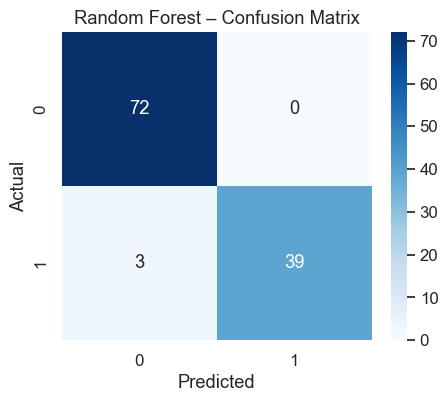

In [14]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


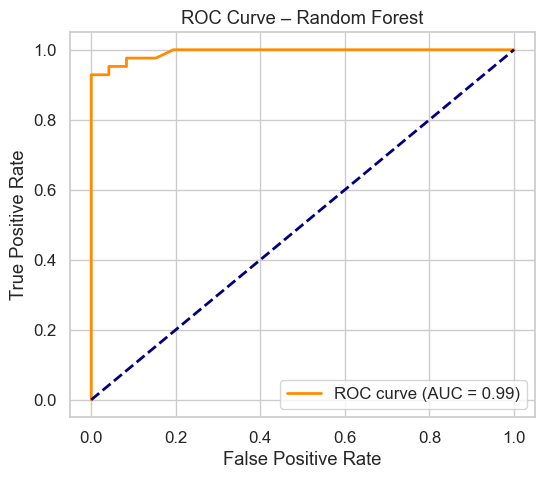

In [15]:
# Probabilities for ROC
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [16]:
# Define grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9626373626373628


In [17]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\n🔹 Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best))



🔹 Tuned Random Forest Accuracy: 0.9736842105263158

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



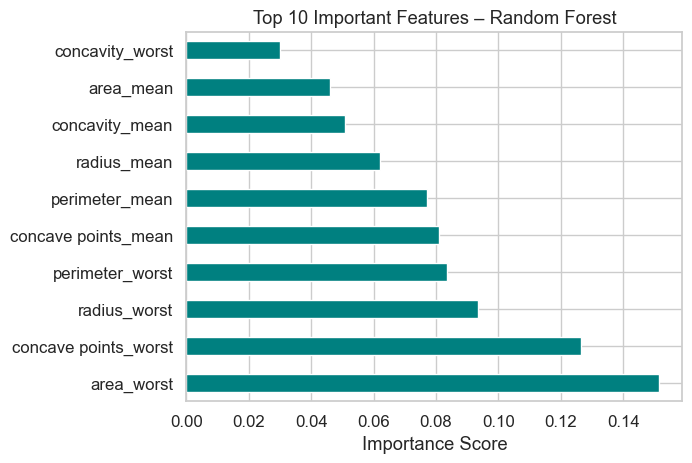

In [18]:
feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(10).plot(kind="barh", color="teal")
plt.title("Top 10 Important Features – Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [19]:
joblib.dump(best_rf, "models/random_forest_model.pkl")
print("✅ Random Forest model saved as 'random_forest_model.pkl'")


✅ Random Forest model saved as 'random_forest_model.pkl'
